### Choosen SKU's
- I. Segment: 568 (challenge olan), 578, 1050
- II. Segment: 319 (en stabil olan), 509/615, 1018 (düşük satışlı olan)

In [263]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/istanbul_data_preprocessed.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4201059 entries, 0 to 4201058
Data columns (total 16 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   MainDistID       int64 
 1   DistID           int64 
 2   Date             object
 3   HcoID            int64 
 4   SalesRegionID_x  int64 
 5   BrandID          int64 
 6   SkuID            int64 
 7   IsReturn         bool  
 8   PaidQty          int64 
 9   FGQty            int64 
 10  IsMrsOrder       bool  
 11  HcoType          object
 12  District         object
 13  SalesRegionID_y  int64 
 14  Status           object
 15  TotalQuantity    int64 
dtypes: bool(2), int64(10), object(4)
memory usage: 456.7+ MB


In [264]:
segment_1_sku_ids = [568, 578, 1050]
segment_2_sku_ids = [319, 509, 615, 1018]

all_sku_ids = segment_1_sku_ids + segment_2_sku_ids

data = data[data['SkuID'].isin(all_sku_ids)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 882540 entries, 0 to 4201055
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   MainDistID       882540 non-null  int64 
 1   DistID           882540 non-null  int64 
 2   Date             882540 non-null  object
 3   HcoID            882540 non-null  int64 
 4   SalesRegionID_x  882540 non-null  int64 
 5   BrandID          882540 non-null  int64 
 6   SkuID            882540 non-null  int64 
 7   IsReturn         882540 non-null  bool  
 8   PaidQty          882540 non-null  int64 
 9   FGQty            882540 non-null  int64 
 10  IsMrsOrder       882540 non-null  bool  
 11  HcoType          882540 non-null  object
 12  District         877035 non-null  object
 13  SalesRegionID_y  882540 non-null  int64 
 14  Status           882540 non-null  object
 15  TotalQuantity    882540 non-null  int64 
dtypes: bool(2), int64(10), object(4)
memory usage: 102.7+ MB


Calculate the total sales of the choosen SKU's for quarterly. It should be 12 rows in total for every SKU.

In [265]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Quarter'] = data['Date'].dt.quarter

data = data.groupby(['Year', 'Quarter', 'SkuID']).agg({'TotalQuantity': 'sum'}).reset_index()
data

,Year,Quarter,SkuID,TotalQuantity
0,2019,1,319,46823
1,2019,1,509,43084
2,2019,1,568,145879
3,2019,1,578,102933
4,2019,1,615,37197
...,...,...,...,...
79,2021,4,568,225966
80,2021,4,578,109939
81,2021,4,615,36842
82,2021,4,1018,19213


# Analysis

In [266]:
sku_319 = data[data['SkuID'] == 319]
sku_319

,Year,Quarter,SkuID,TotalQuantity
0,2019,1,319,46823
7,2019,2,319,42588
14,2019,3,319,42818
21,2019,4,319,49943
28,2020,1,319,56466
35,2020,2,319,49173
42,2020,3,319,50841
49,2020,4,319,59334
56,2021,1,319,62174
63,2021,2,319,53335


## Total Quantity of SKU's for each quarter

In [267]:
# Plot SKU sales for each quarter    
def plot_sku(sku_id):
    sku = data[data['SkuID'] == sku_id]
    plt.figure(figsize=(12, 6))
    plt.plot(sku['Year'].astype(str) + '-' + sku['Quarter'].astype(str), sku['TotalQuantity'])
    plt.title(f'SKU {sku_id} Total Quantity by Quarter')
    plt.xlabel('Quarter')
    plt.ylabel('Total Quantity')
    plt.xticks(rotation=45)
    plt.show()

SKU 568
    Year  Quarter  SkuID  TotalQuantity
2   2019        1    568         145879
9   2019        2    568         123537
16  2019        3    568         119842
23  2019        4    568         156914
30  2020        1    568         153770
37  2020        2    568         131709
44  2020        3    568         138093
51  2020        4    568         154361
58  2021        1    568         139976
65  2021        2    568         165927
72  2021        3    568         114512
79  2021        4    568         225966


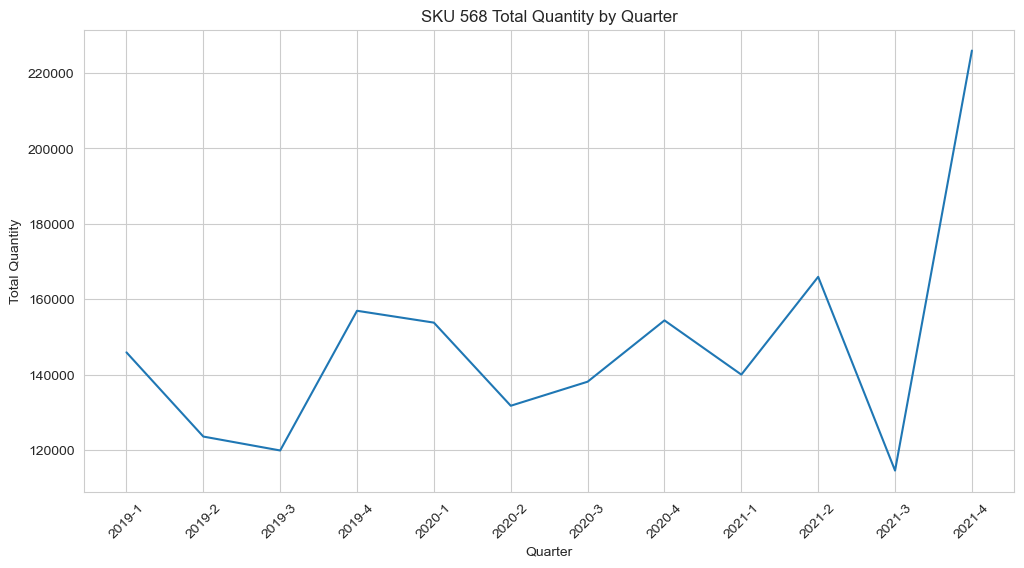

SKU 578
    Year  Quarter  SkuID  TotalQuantity
3   2019        1    578         102933
10  2019        2    578          89753
17  2019        3    578          76777
24  2019        4    578          97961
31  2020        1    578          98585
38  2020        2    578          87533
45  2020        3    578          79894
52  2020        4    578          78047
59  2021        1    578          91852
66  2021        2    578          81332
73  2021        3    578          60905
80  2021        4    578         109939


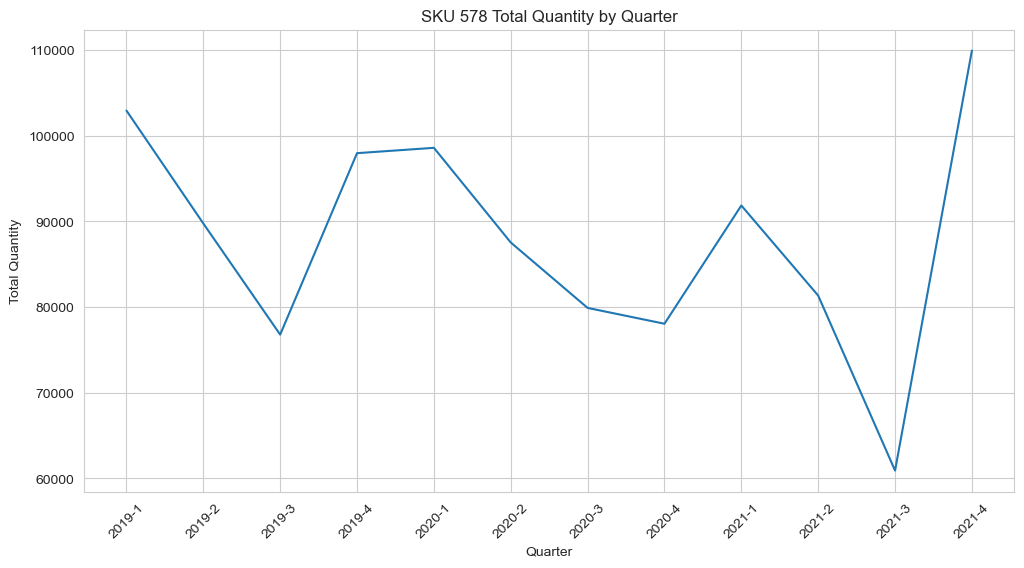

SKU 1050
    Year  Quarter  SkuID  TotalQuantity
6   2019        1   1050          52981
13  2019        2   1050          46656
20  2019        3   1050          60115
27  2019        4   1050          75765
34  2020        1   1050          98657
41  2020        2   1050          87386
48  2020        3   1050          58010
55  2020        4   1050          82377
62  2021        1   1050          78269
69  2021        2   1050          69268
76  2021        3   1050          79958
83  2021        4   1050          90674


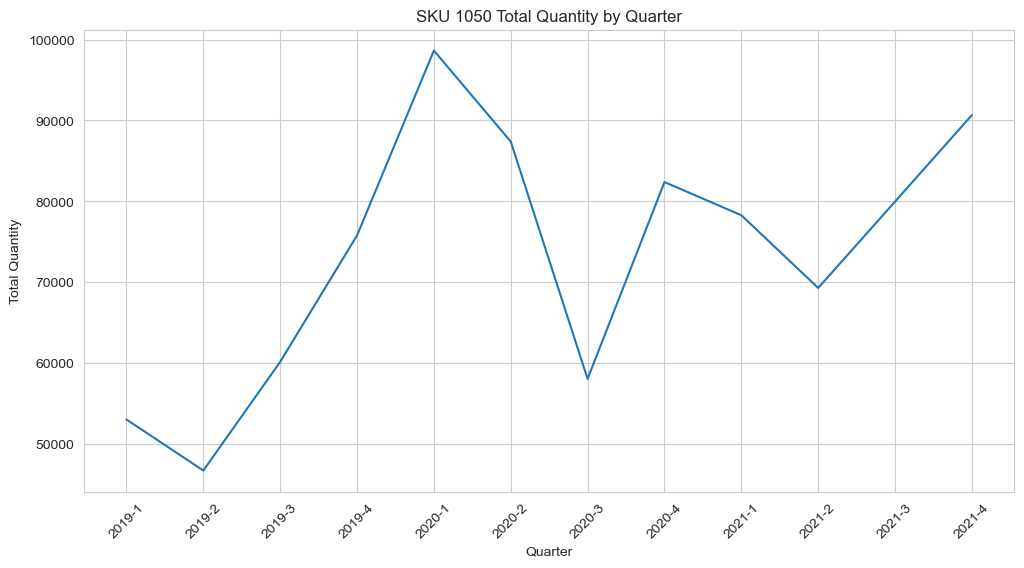

SKU 319
    Year  Quarter  SkuID  TotalQuantity
0   2019        1    319          46823
7   2019        2    319          42588
14  2019        3    319          42818
21  2019        4    319          49943
28  2020        1    319          56466
35  2020        2    319          49173
42  2020        3    319          50841
49  2020        4    319          59334
56  2021        1    319          62174
63  2021        2    319          53335
70  2021        3    319          52102
77  2021        4    319          76375


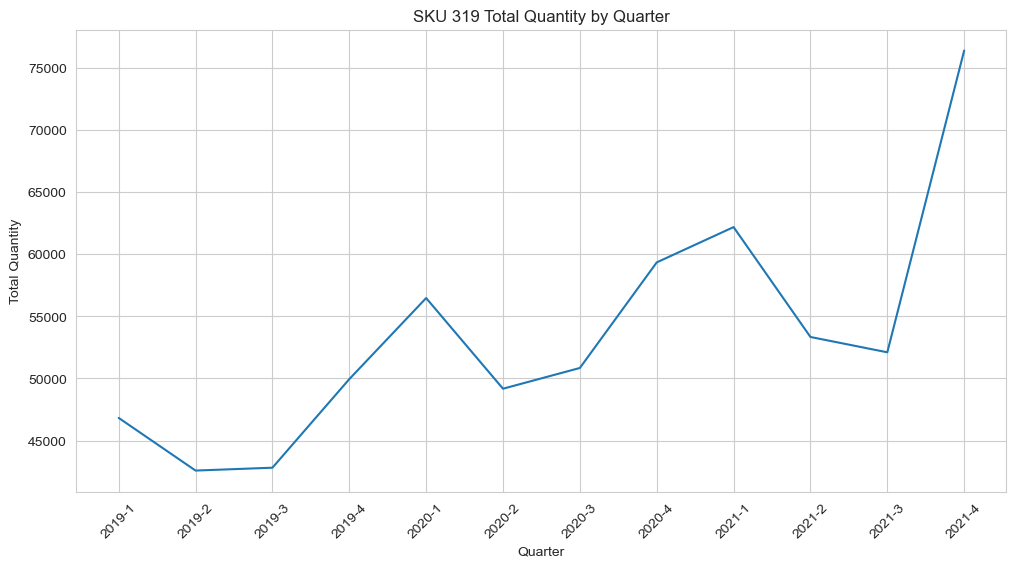

SKU 509
    Year  Quarter  SkuID  TotalQuantity
1   2019        1    509          43084
8   2019        2    509          35255
15  2019        3    509          30328
22  2019        4    509          35910
29  2020        1    509          39070
36  2020        2    509          40373
43  2020        3    509          32375
50  2020        4    509          34871
57  2021        1    509          38401
64  2021        2    509          32529
71  2021        3    509          30596
78  2021        4    509          36852


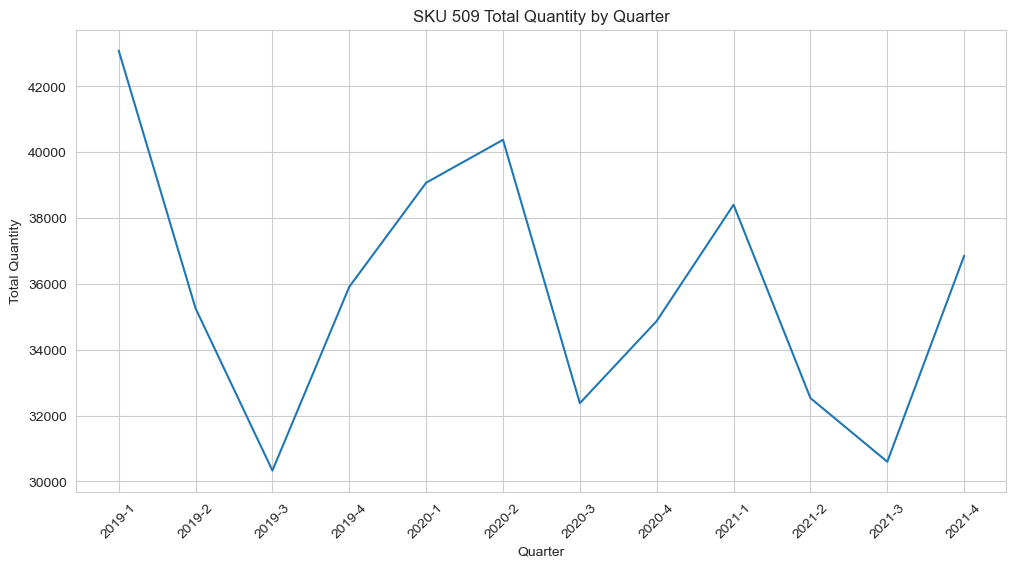

SKU 615
    Year  Quarter  SkuID  TotalQuantity
4   2019        1    615          37197
11  2019        2    615          32159
18  2019        3    615          26647
25  2019        4    615          31652
32  2020        1    615          36366
39  2020        2    615          39597
46  2020        3    615          35966
53  2020        4    615          35007
60  2021        1    615          39269
67  2021        2    615          32296
74  2021        3    615          27608
81  2021        4    615          36842


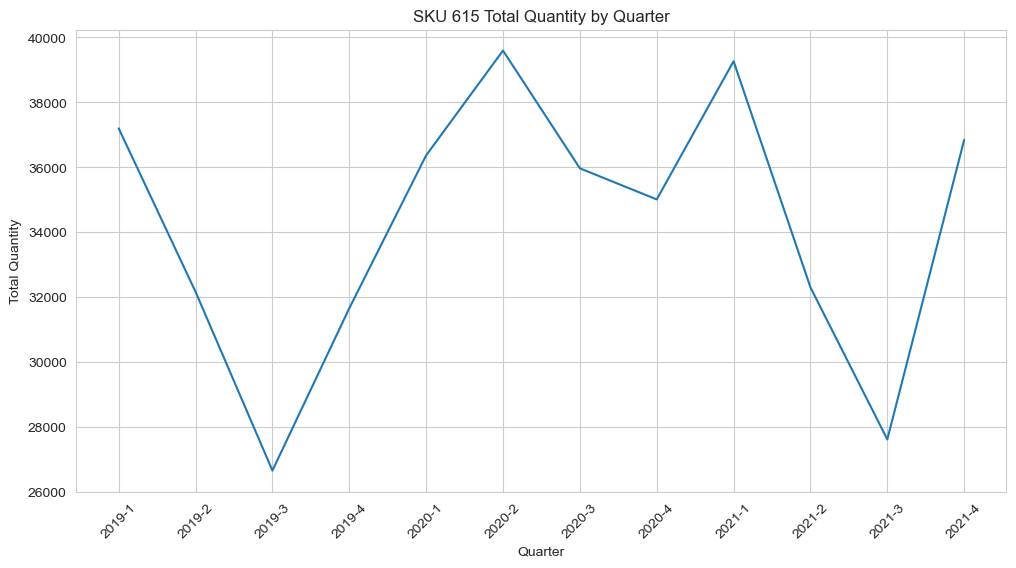

SKU 1018
    Year  Quarter  SkuID  TotalQuantity
5   2019        1   1018          13937
12  2019        2   1018          12767
19  2019        3   1018          11758
26  2019        4   1018          14721
33  2020        1   1018          16743
40  2020        2   1018          16719
47  2020        3   1018          14319
54  2020        4   1018          16976
61  2021        1   1018          19435
68  2021        2   1018          15390
75  2021        3   1018          14559
82  2021        4   1018          19213


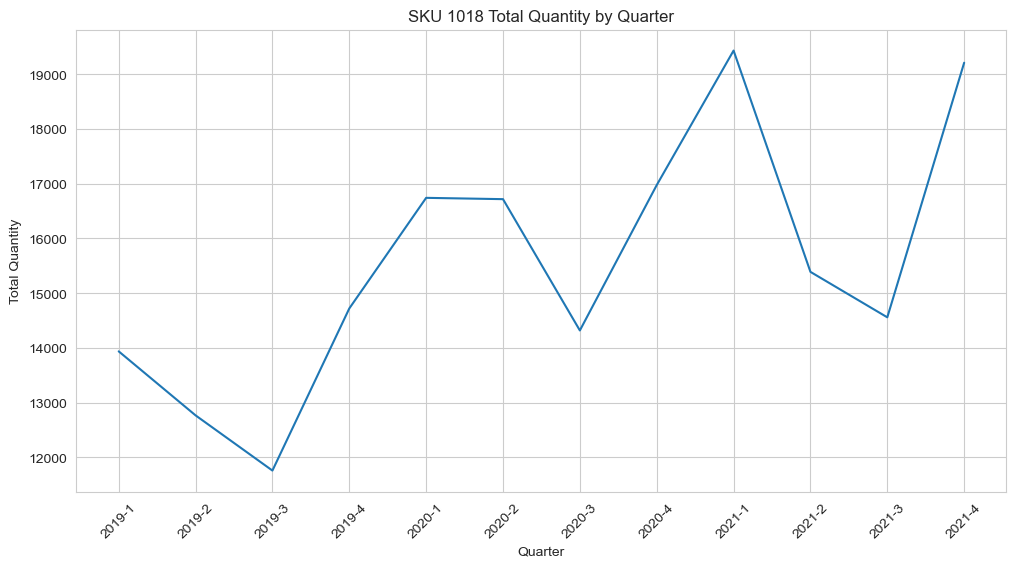

In [268]:
for sku_id in all_sku_ids:
    print(f'SKU {sku_id}')
    sku_data = data[data['SkuID'] == sku_id]
    print(sku_data)
    plot_sku(sku_id)

Control these:
- Trend 
- Seasonality
- Cyclical
- Random

SKU 568


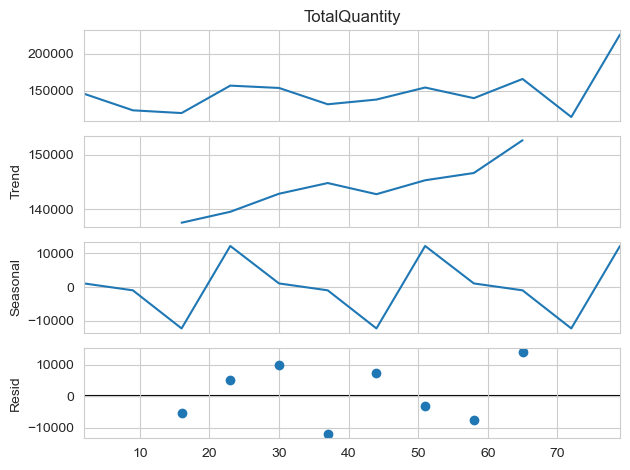

SKU 578


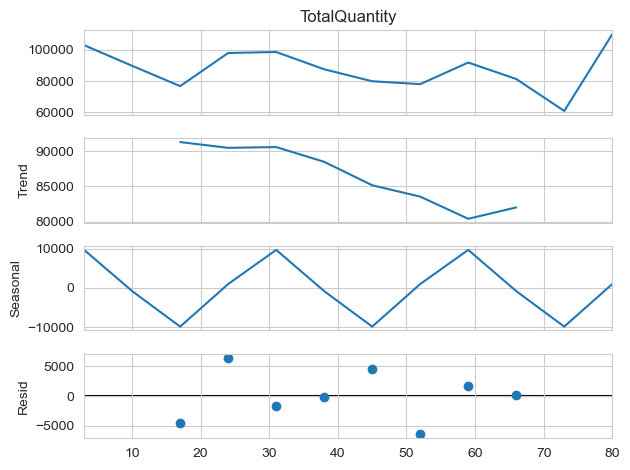

SKU 1050


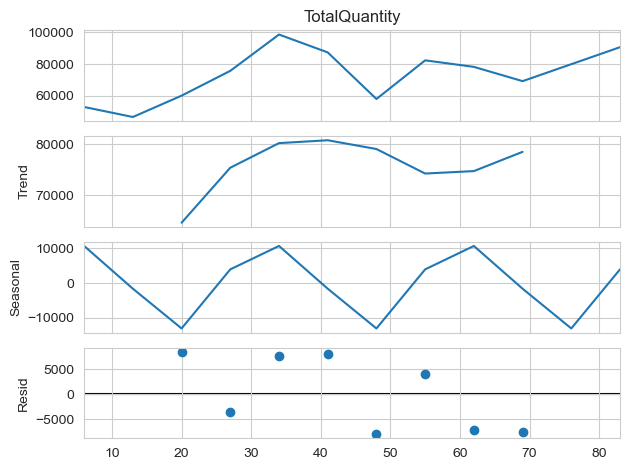

SKU 319


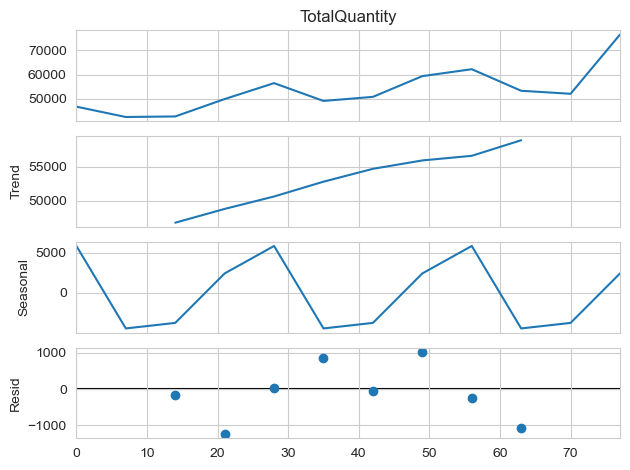

SKU 509


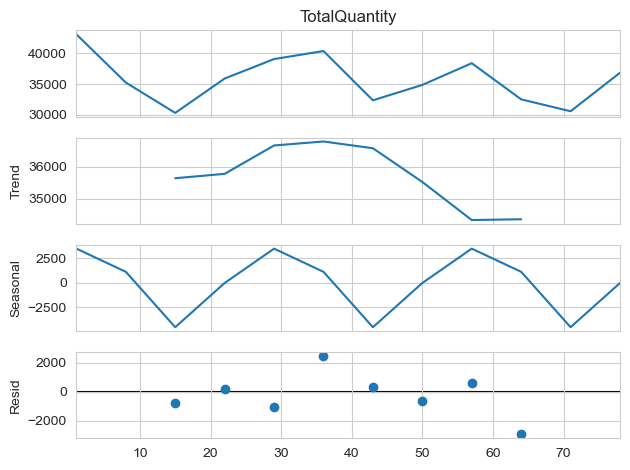

SKU 615


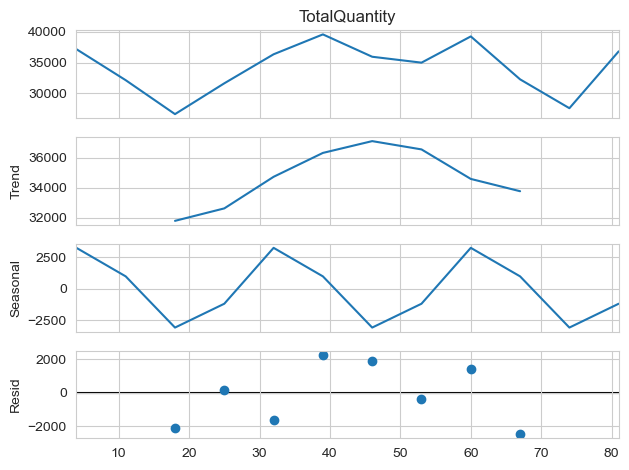

SKU 1018


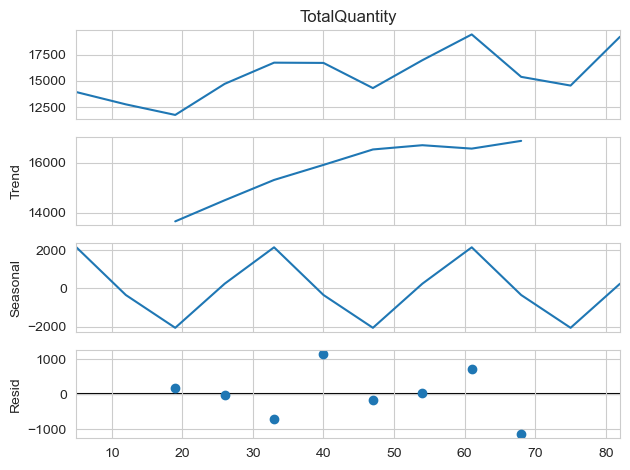

In [269]:
from statsmodels.tsa.seasonal import seasonal_decompose

for sku_id in all_sku_ids:
    print(f'SKU {sku_id}')
    sku_data = data[data['SkuID'] == sku_id]
    result = seasonal_decompose(sku_data['TotalQuantity'], model='additive', period=4)
    result.plot()
    plt.show()

# Forecasting
## Exponential Smoothing

In [270]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing

# create a table to store the forecast values
exponential_smoothing_forecast = []

def forecast_sku_ExponentialSmoothing(sku_id):
    sku_data = data[data['SkuID'] == sku_id]
    train = sku_data['TotalQuantity'][:-4]
    test = sku_data['TotalQuantity'][-4:]
    model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=4).fit()
    forecast = model.forecast(4)
    forecast = forecast.astype(int)
    forecast_table = pd.DataFrame({'Year': [2020, 2020, 2020, 2020], 'Quarter': [1, 2, 3, 4], 'Forecasted': forecast, 'Actual': 
                                test.values, 'Error': test.values - forecast})
    
    # Year and Quarter columns should be index for the table
    forecast_table.set_index(['Year', 'Quarter'], inplace=True)
    
    
    # calculate MAPE, Mean Absolute Percentage Error, it is a measure of prediction accuracy of a forecasting method
    mape = (abs(forecast - test.values) / test.values).mean()
    # calculate MSE, Mean Squared Error, it is a measure of the average of the squares of the errors
    mse = ((forecast - test.values) ** 2).mean()
    # calculate RMSE, Root Mean Squared Error, it is a measure of the average of the squares of the errors
    rmse = mse ** 0.5
    
    # store the exponential smoothing forecast values in the exponential_smoothing_forecast table to compare with other forecasting methods
    exponential_smoothing_forecast.append({'sku_id': sku_id, 'mape': round(mape, 3), 'mse': round(mse, 3), 'rmse': round(rmse, 3)})
    
    
    print(f'SKU {sku_id} Exponential Smoothing Forecast'f'\n\n{forecast_table}\n')
    print(f'MAPE: {mape}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print('===============\n')

In [271]:
for sku_id in all_sku_ids:
    forecast_sku_ExponentialSmoothing(sku_id)

SKU 568 Exponential Smoothing Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1            152094  139976 -12118
     2            129495  165927  36432
     3            128604  114512 -14092
     4            159160  225966  66806

MAPE: 0.1812115014565409
MSE: 1533940662.0
RMSE: 39165.55453456519

SKU 578 Exponential Smoothing Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             98056   91852  -6204
     2             85657   81332  -4325
     3             74441   60905 -13536
     4             88908  109939  21031

MAPE: 0.13356632389693576
MSE: 170680374.5
RMSE: 13064.469928014683

SKU 1050 Exponential Smoothing Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             64242   78269  14027
     2             57915   69268  11353
     3             71369   79958   8589
     4             87021   90674   3653

MAPE: 0.12270524604

/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/ts

In [272]:
exponential_smoothing_forecast = pd.DataFrame(exponential_smoothing_forecast)
exponential_smoothing_forecast.set_index('sku_id', inplace=True)
exponential_smoothing_forecast

,mape,mse,rmse
sku_id,,,
568,0.181,1.533941e+09,39165.555
578,0.134,1.706804e+08,13064.470
1050,0.123,1.031907e+08,10158.281
319,0.079,8.609675e+07,9278.834
509,0.060,7.612652e+06,2759.103
615,0.124,2.088601e+07,4570.121
1018,0.076,2.577900e+06,1605.584


## Moving Average

In [273]:
# create a table to store the forecast values
moving_average_forecast = []

def forecast_sku_MovingAverage(sku_id):
    sku_data = data[data['SkuID'] == sku_id]
    train = sku_data['TotalQuantity'][:-4]
    test = sku_data['TotalQuantity'][-4:]
    forecast = train.rolling(window=4).mean().iloc[-4:]
    forecast = forecast.astype(int)
    forecast_table = pd.DataFrame({'Year': [2020, 2020, 2020, 2020], 'Quarter': [1, 2, 3, 4], 'Forecasted': forecast, 'Actual': 
                                test.values, 'Error': test.values - forecast})
    forecast_table.set_index(['Year', 'Quarter'], inplace=True)
    
    
    # calculate MAPE, Mean Absolute Percentage Error, it is a measure of prediction accuracy of a forecasting method
    mape = (abs(forecast - test.values) / test.values).mean()
    # calculate MSE, Mean Squared Error, it is a measure of the average of the squares of the errors
    mse = ((forecast - test.values) ** 2).mean()
    # calculate RMSE, Root Mean Squared Error, it is a measure of the average of the squares of the errors
    rmse = mse ** 0.5
    
    # store the moving average forecast values in the moving_average_forecast table to compare with other forecasting methods
    moving_average_forecast.append({'sku_id': sku_id, 'mape': round(mape, 3), 'mse': round(mse, 3), 'rmse': round(rmse, 3)})
    
    print(f'SKU {sku_id} Moving Average Forecast'f'\n\n{forecast_table}\n')
    print(f'MAPE: {mape}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print('===============\n')

In [274]:
for sku_id in all_sku_ids:
    forecast_sku_MovingAverage(sku_id)

SKU 568 Moving Average Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1            138515  139976   1461
     2            140558  165927  25369
     3            145121  114512 -30609
     4            144483  225966  81483

MAPE: 0.1978070086916459
MSE: 2055527713.0
RMSE: 45337.92797426896

SKU 578 Moving Average Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             90769   91852   1083
     2             90214   81332  -8882
     3             90993   60905 -30088
     4             86014  109939  23925

MAPE: 0.20815834133434688
MSE: 389439045.5
RMSE: 19734.21002979344

SKU 1050 Moving Average Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             70298   78269   7971
     2             80480   69268 -11212
     3             79954   79958      4
     4             81607   90674   9067

MAPE: 0.09093769139489737
MSE: 67864072.5

In [275]:
moving_average_forecast = pd.DataFrame(moving_average_forecast)
moving_average_forecast.set_index('sku_id', inplace=True)
moving_average_forecast

,mape,mse,rmse
sku_id,,,
568,0.198,2.055528e+09,45337.928
578,0.208,3.894390e+08,19734.210
1050,0.091,6.786407e+07,8237.965
319,0.150,1.797950e+08,13408.767
509,0.104,1.648782e+07,4060.520
615,0.134,3.187384e+07,5645.692
1018,0.134,1.000420e+07,3162.942


In [276]:
# create a table to store the naive forecast values
naive_forecast = []

def forecast_sku_Naive(sku_id):
    sku_data = data[data['SkuID'] == sku_id]
    train = sku_data['TotalQuantity'][:-4]
    test = sku_data['TotalQuantity'][-4:]
    forecast = train.iloc[-1]
    forecast = forecast.astype(int)
    forecast_table = pd.DataFrame({'Year': [2020, 2020, 2020, 2020], 'Quarter': [1, 2, 3, 4], 'Forecasted': forecast, 'Actual': 
                                test.values, 'Error': test.values - forecast})
    
    # Year and Quarter columns should be index for the table
    forecast_table.set_index(['Year', 'Quarter'], inplace=True)
    
    
    # calculate MAPE, Mean Absolute Percentage Error, it is a measure of prediction accuracy of a forecasting method
    mape = (abs(forecast - test.values) / test.values).mean()
    # calculate MSE, Mean Squared Error, it is a measure of the average of the squares of the errors
    mse = ((forecast - test.values) ** 2).mean()
    # calculate RMSE, Root Mean Squared Error, it is a measure of the average of the squares of the errors
    rmse = mse ** 0.5
    
    # store the naive forecast values in the naive_forecast table to compare with other forecasting methods
    naive_forecast.append({'sku_id': sku_id, 'mape': round(mape, 3), 'mse': round(mse, 3), 'rmse': round(rmse, 3)})
    
    
    print(f'SKU {sku_id} Naive Forecast'f'\n\n{forecast_table}\n')
    print(f'MAPE: {mape}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print('===============\n')
    

In [277]:
for sku_id in all_sku_ids:
    forecast_sku_Naive(sku_id)

SKU 568 Naive Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1            154361  139976 -14385
     2            154361  165927  11566
     3            154361  114512 -39849
     4            154361  225966  71605

MAPE: 0.20933666399672202
MSE: 1763979851.75
RMSE: 41999.760139196034

SKU 578 Naive Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             78047   91852  13805
     2             78047   81332   3285
     3             78047   60905 -17142
     4             78047  109939  31892

MAPE: 0.19055724982646027
MSE: 378079269.5
RMSE: 19444.26057992435

SKU 1050 Naive Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             82377   78269  -4108
     2             82377   69268 -13109
     3             82377   79958  -2419
     4             82377   90674   8297

MAPE: 0.09087327934514079
MSE: 65853328.75
RMSE: 8115.00639248053

In [278]:
naive_forecast = pd.DataFrame(naive_forecast)
naive_forecast.set_index('sku_id', inplace=True)
naive_forecast

,mape,mse,rmse
sku_id,,,
568,0.209,1.763980e+09,41999.760
578,0.191,3.780793e+08,19444.261
1050,0.091,6.585333e+07,8115.006
319,0.130,9.668778e+07,9832.994
509,0.089,1.003646e+07,3168.038
615,0.128,2.090665e+07,4572.379
1018,0.128,4.852034e+06,2202.733


There are seasonal patterns in the data. So, we can use forecasting methods that can capture the seasonality.
- Triple Exponential Smoothing
- ARIMA
- SARIMA

In [282]:
# create a table to store the triple exponential smoothing forecast values
triple_exponential_smoothing_forecast = []

def forecast_sku_TripleExponentialSmoothing(sku_id):
    sku_data = data[data['SkuID'] == sku_id]
    train = sku_data['TotalQuantity'][:-4]
    test = sku_data['TotalQuantity'][-4:]
    model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=4, trend='add').fit()
    forecast = model.forecast(4)
    forecast = forecast.astype(int)
    forecast_table = pd.DataFrame({'Year': [2020, 2020, 2020, 2020], 'Quarter': [1, 2, 3, 4], 'Forecasted': forecast, 'Actual': 
                                test.values, 'Error': test.values - forecast})
    
    # Year and Quarter columns should be index for the table
    forecast_table.set_index(['Year', 'Quarter'], inplace=True)
    
    
    # calculate MAPE, Mean Absolute Percentage Error, it is a measure of prediction accuracy of a forecasting method
    mape = (abs(forecast - test.values) / test.values).mean()
    # calculate MSE, Mean Squared Error, it is a measure of the average of the squares of the errors
    mse = ((forecast - test.values) ** 2).mean()
    # calculate RMSE, Root Mean Squared Error, it is a measure of the average of the squares of the errors
    rmse = mse ** 0.5
    
    # store the triple exponential smoothing forecast values in the triple_exponential_smoothing_forecast table to compare with other forecasting methods
    triple_exponential_smoothing_forecast.append({'sku_id': sku_id, 'mape': round(mape, 3), 'mse': round(mse, 3), 'rmse': round(rmse, 3)})
    
    
    print(f'SKU {sku_id} Triple Exponential Smoothing Forecast'f'\n\n{forecast_table}\n')
    print(f'MAPE: {mape}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print('===============\n')

    

In [283]:
for sku_id in all_sku_ids:
    forecast_sku_TripleExponentialSmoothing(sku_id)

/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/ts

SKU 568 Triple Exponential Smoothing Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1            161709  139976 -21733
     2            139646  165927  26281
     3            145978  114512 -31466
     4            172791  225966  53175

MAPE: 0.20593942569113707
MSE: 1245176007.75
RMSE: 35287.05155931847

SKU 578 Triple Exponential Smoothing Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             94644   91852  -2792
     2             81172   81332    160
     3             68392   60905  -7487
     4             87178  109939  22761

MAPE: 0.09058152837787799
MSE: 145484788.5
RMSE: 12061.70752837259

SKU 1050 Triple Exponential Smoothing Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1            121266   78269 -42997
     2            109904   69268 -40636
     3             80652   79958   -694
     4            121213   90674 -3053

In [284]:
    
triple_exponential_smoothing_forecast = pd.DataFrame(triple_exponential_smoothing_forecast)
triple_exponential_smoothing_forecast.set_index('sku_id', inplace=True)
triple_exponential_smoothing_forecast

,mape,mse,rmse
sku_id,,,
568,0.206,1.245176e+09,35287.052
578,0.091,1.454848e+08,12061.708
1050,0.370,1.108285e+09,33290.910
319,0.079,4.621449e+07,6798.124
509,0.075,1.094344e+07,3308.086
615,0.164,3.077551e+07,5547.568
1018,0.085,2.727552e+06,1651.530


In [290]:
# create a table to store the ARIMA forecast values

from statsmodels.tsa.arima.model import ARIMA


arima_forecast = []

def forecast_sku_ARIMA(sku_id):
    sku_data = data[data['SkuID'] == sku_id]
    train = sku_data['TotalQuantity'][:-4]
    test = sku_data['TotalQuantity'][-4:]
    model = ARIMA(train, order=(1, 1, 1)).fit()
    forecast = model.forecast(steps=4)
    forecast = forecast.astype(int)
    forecast_table = pd.DataFrame({'Year': [2020, 2020, 2020, 2020], 'Quarter': [1, 2, 3, 4], 'Forecasted': forecast, 'Actual': 
                                test.values, 'Error': test.values - forecast})
    
    # Year and Quarter columns should be index for the table
    forecast_table.set_index(['Year', 'Quarter'], inplace=True)
    
    
    # calculate MAPE, Mean Absolute Percentage Error, it is a measure of prediction accuracy of a forecasting method
    mape = (abs(forecast - test.values) / test.values).mean()
    # calculate MSE, Mean Squared Error, it is a measure of the average of the squares of the errors
    mse = ((forecast - test.values) ** 2).mean()
    # calculate RMSE, Root Mean Squared Error, it is a measure of the average of the squares of the errors
    rmse = mse ** 0.5
    
    # store the ARIMA forecast values in the arima_forecast table to compare with other forecasting methods
    arima_forecast.append({'sku_id': sku_id, 'mape': round(mape, 3), 'mse': round(mse, 3), 'rmse': round(rmse, 3)})
    
    print(f'SKU {sku_id} ARIMA Forecast'f'\n\n{forecast_table}\n')
    print(f'MAPE: {mape}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print('===============\n')
    

In [291]:
for sku_id in all_sku_ids:
    forecast_sku_ARIMA(sku_id)

SKU 568 ARIMA Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1            151601  139976 -11625
     2            151457  165927  14470
     3            151450  114512 -36938
     4            151449  225966  74517

MAPE: 0.20564916010672687
MSE: 1815430164.5
RMSE: 42607.86505447087

SKU 578 ARIMA Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             79021   91852  12831
     2             79245   81332   2087
     3             79296   60905 -18391
     4             79308  109939  30631

MAPE: 0.18648314624826967
MSE: 361369293.0
RMSE: 19009.715752740754

SKU 1050 ARIMA Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             80114   78269  -1845
     2             80143   69268 -10875
     3             80142   79958   -184
     4             80142   90674  10532

MAPE: 0.07475625801232283
MSE: 58156632.5
RMSE: 7626.049599891152


/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: N

In [293]:
arima_forecast = pd.DataFrame(arima_forecast)
arima_forecast.set_index('sku_id', inplace=True)
arima_forecast

,mape,mse,rmse
sku_id,,,
568,0.206,1.815430e+09,42607.865
578,0.186,3.613693e+08,19009.716
1050,0.075,5.815663e+07,7626.050
319,0.128,1.000076e+08,10000.378
509,0.088,1.961854e+07,4429.282
615,0.121,1.885622e+07,4342.375
1018,0.125,5.015902e+06,2239.621


In [294]:
# create a table to store the SARIMA forecast values
sarima_forecast = []

from statsmodels.tsa.statespace.sarimax import SARIMAX

def forecast_sku_SARIMA(sku_id):
    sku_data = data[data['SkuID'] == sku_id]
    train = sku_data['TotalQuantity'][:-4]
    test = sku_data['TotalQuantity'][-4:]
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4)).fit()
    forecast = model.forecast(steps=4)
    forecast = forecast.astype(int)
    forecast_table = pd.DataFrame({'Year': [2020, 2020, 2020, 2020], 'Quarter': [1, 2, 3, 4], 'Forecasted': forecast, 'Actual': 
                                test.values, 'Error': test.values - forecast})
    
    # Year and Quarter columns should be index for the table
    forecast_table.set_index(['Year', 'Quarter'], inplace=True)
    
    
    # calculate MAPE, Mean Absolute Percentage Error, it is a measure of prediction accuracy of a forecasting method
    mape = (abs(forecast - test.values) / test.values).mean()
    # calculate MSE, Mean Squared Error, it is a measure of the average of the squares of the errors
    mse = ((forecast - test.values) ** 2).mean()
    # calculate RMSE, Root Mean Squared Error, it is a measure of the average of the squares of the errors
    rmse = mse ** 0.5
    
    # store the SARIMA forecast values in the sarima_forecast table to compare with other forecasting methods
    sarima_forecast.append({'sku_id': sku_id, 'mape': round(mape, 3), 'mse': round(mse, 3), 'rmse': round(rmse, 3)})
    
    print(f'SKU {sku_id} SARIMA Forecast'f'\n\n{forecast_table}\n')
    print(f'MAPE: {mape}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print('===============\n')
    



In [295]:
for sku_id in all_sku_ids:
    forecast_sku_SARIMA(sku_id)
    

/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observatio

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.10786D+00    |proj g|=  8.11347D-01

At iterate    5    f=  3.88460D+00    |proj g|=  6.49146D-02

At iterate   10    f=  3.84702D+00    |proj g|=  7.28310D-02

At iterate   15    f=  3.84303D+00    |proj g|=  1.20687D-02

At iterate   20    f=  3.84285D+00    |proj g|=  1.89468D-03

At iterate   25    f=  3.84283D+00    |proj g|=  3.31901D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     29      1     0     0   

/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/senaoz/anaconda3/lib/python3.11/site-p


At iterate   50    f=  3.13345D+00    |proj g|=  1.82780D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     79      1     0     0   1.828D+00   3.133D+00
  F =   3.1334473556709836     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
SKU 509 SARIMA Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             47640   38401  -9239
     2             44535   32529 -12006
     3             36619   30596  -6023
     4             43077   36852  -6225

MAPE: 0.24386336406455994
MSE: 76132577.75
RMSE: 8725.39842929823

RUNNING THE L-BFGS-B CODE

 

/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observatio

In [296]:
sarima_forecast = pd.DataFrame(sarima_forecast)
sarima_forecast.set_index('sku_id', inplace=True)
sarima_forecast

,mape,mse,rmse
sku_id,,,
568,0.407,4.154596e+09,64456.156
578,0.699,3.414105e+09,58430.342
1050,0.758,3.615398e+09,60128.183
319,0.126,1.075144e+08,10368.917
509,0.244,7.613258e+07,8725.398
615,0.486,2.600438e+08,16125.873
1018,0.161,8.812714e+06,2968.622
